<a href="https://colab.research.google.com/github/MahiSharma000/Machine_Learning/blob/main/23MCA1058_Exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**23MCA1058
MAHI SHARMA
02-02-2024**



**Machine Learning Lab(PMCA507P)
Exercise 3_ Exploratory Analysis for any dataset of your Choicet**

In [ ]:
import numpy as np
import pandas as pd

reading the dataset

In [ ]:
df=pd.read_csv('apple_quality.csv')

In [ ]:
print(df)

        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                           

**PREPROCESSING THE DATASET**

Encodes the 'Quality' column using LabelEncoder, converting 'good' to 1 and 'bad' to 0.
Drops any rows with missing values.
Drops the 'A_id' column, assuming it's not needed for analysis.
Scales the numeric features using MinMaxScaler.

In [ ]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

print(df.head())

label_encoder = LabelEncoder()
df['Quality'] = label_encoder.fit_transform(df['Quality'])

# Handle missing values if any
df.dropna(inplace=True)

# Assuming 'A_id' column is not relevant for analysis
df = df.drop('A_id', axis=1)

# Scaling numeric features
scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Display the preprocessed data
print(df.head())



   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  
       Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0  0.234669  0.358370   0.922484     0.368781   0.585819  0.472770  0.452225   
1  0.439331  0.333107   0.795706     0.558928   0.511408  0.513807  0.436185   
2  0.505948  0.448092   0.388567     0.417732   0.660388  0.444693  0.668192   
3  0.479014  0.376971   0.619422     0.435629   0.720370  0.187052 

**VISUALIZATION**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Boxplots: Individual boxplots for each feature, comparing the distribution for 'good' and 'bad' quality.

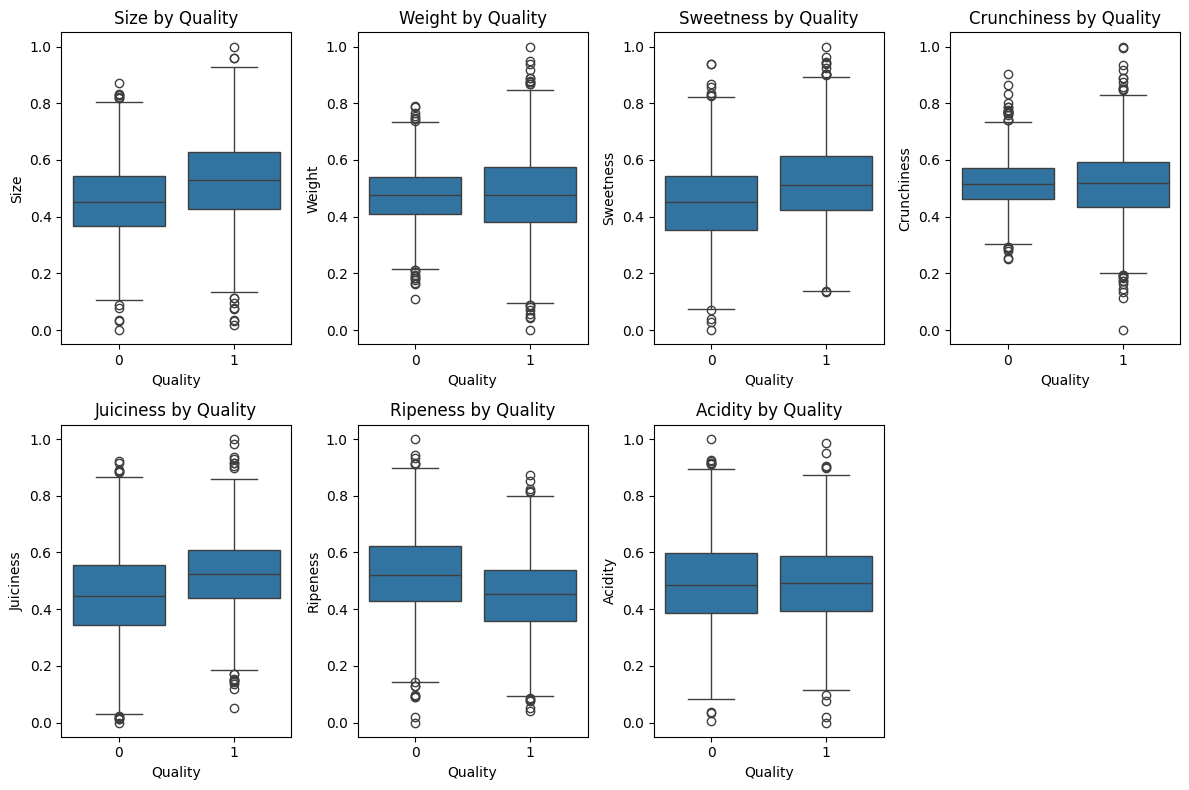

In [ ]:
# Boxplot for each feature colored by 'Quality'
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='Quality', y=column, data=df)
    plt.title(f'{column} by Quality')
plt.tight_layout()
plt.show()

Pairplot: A grid of scatterplots for all pairs of numeric features, with the points colored by 'Quality'.

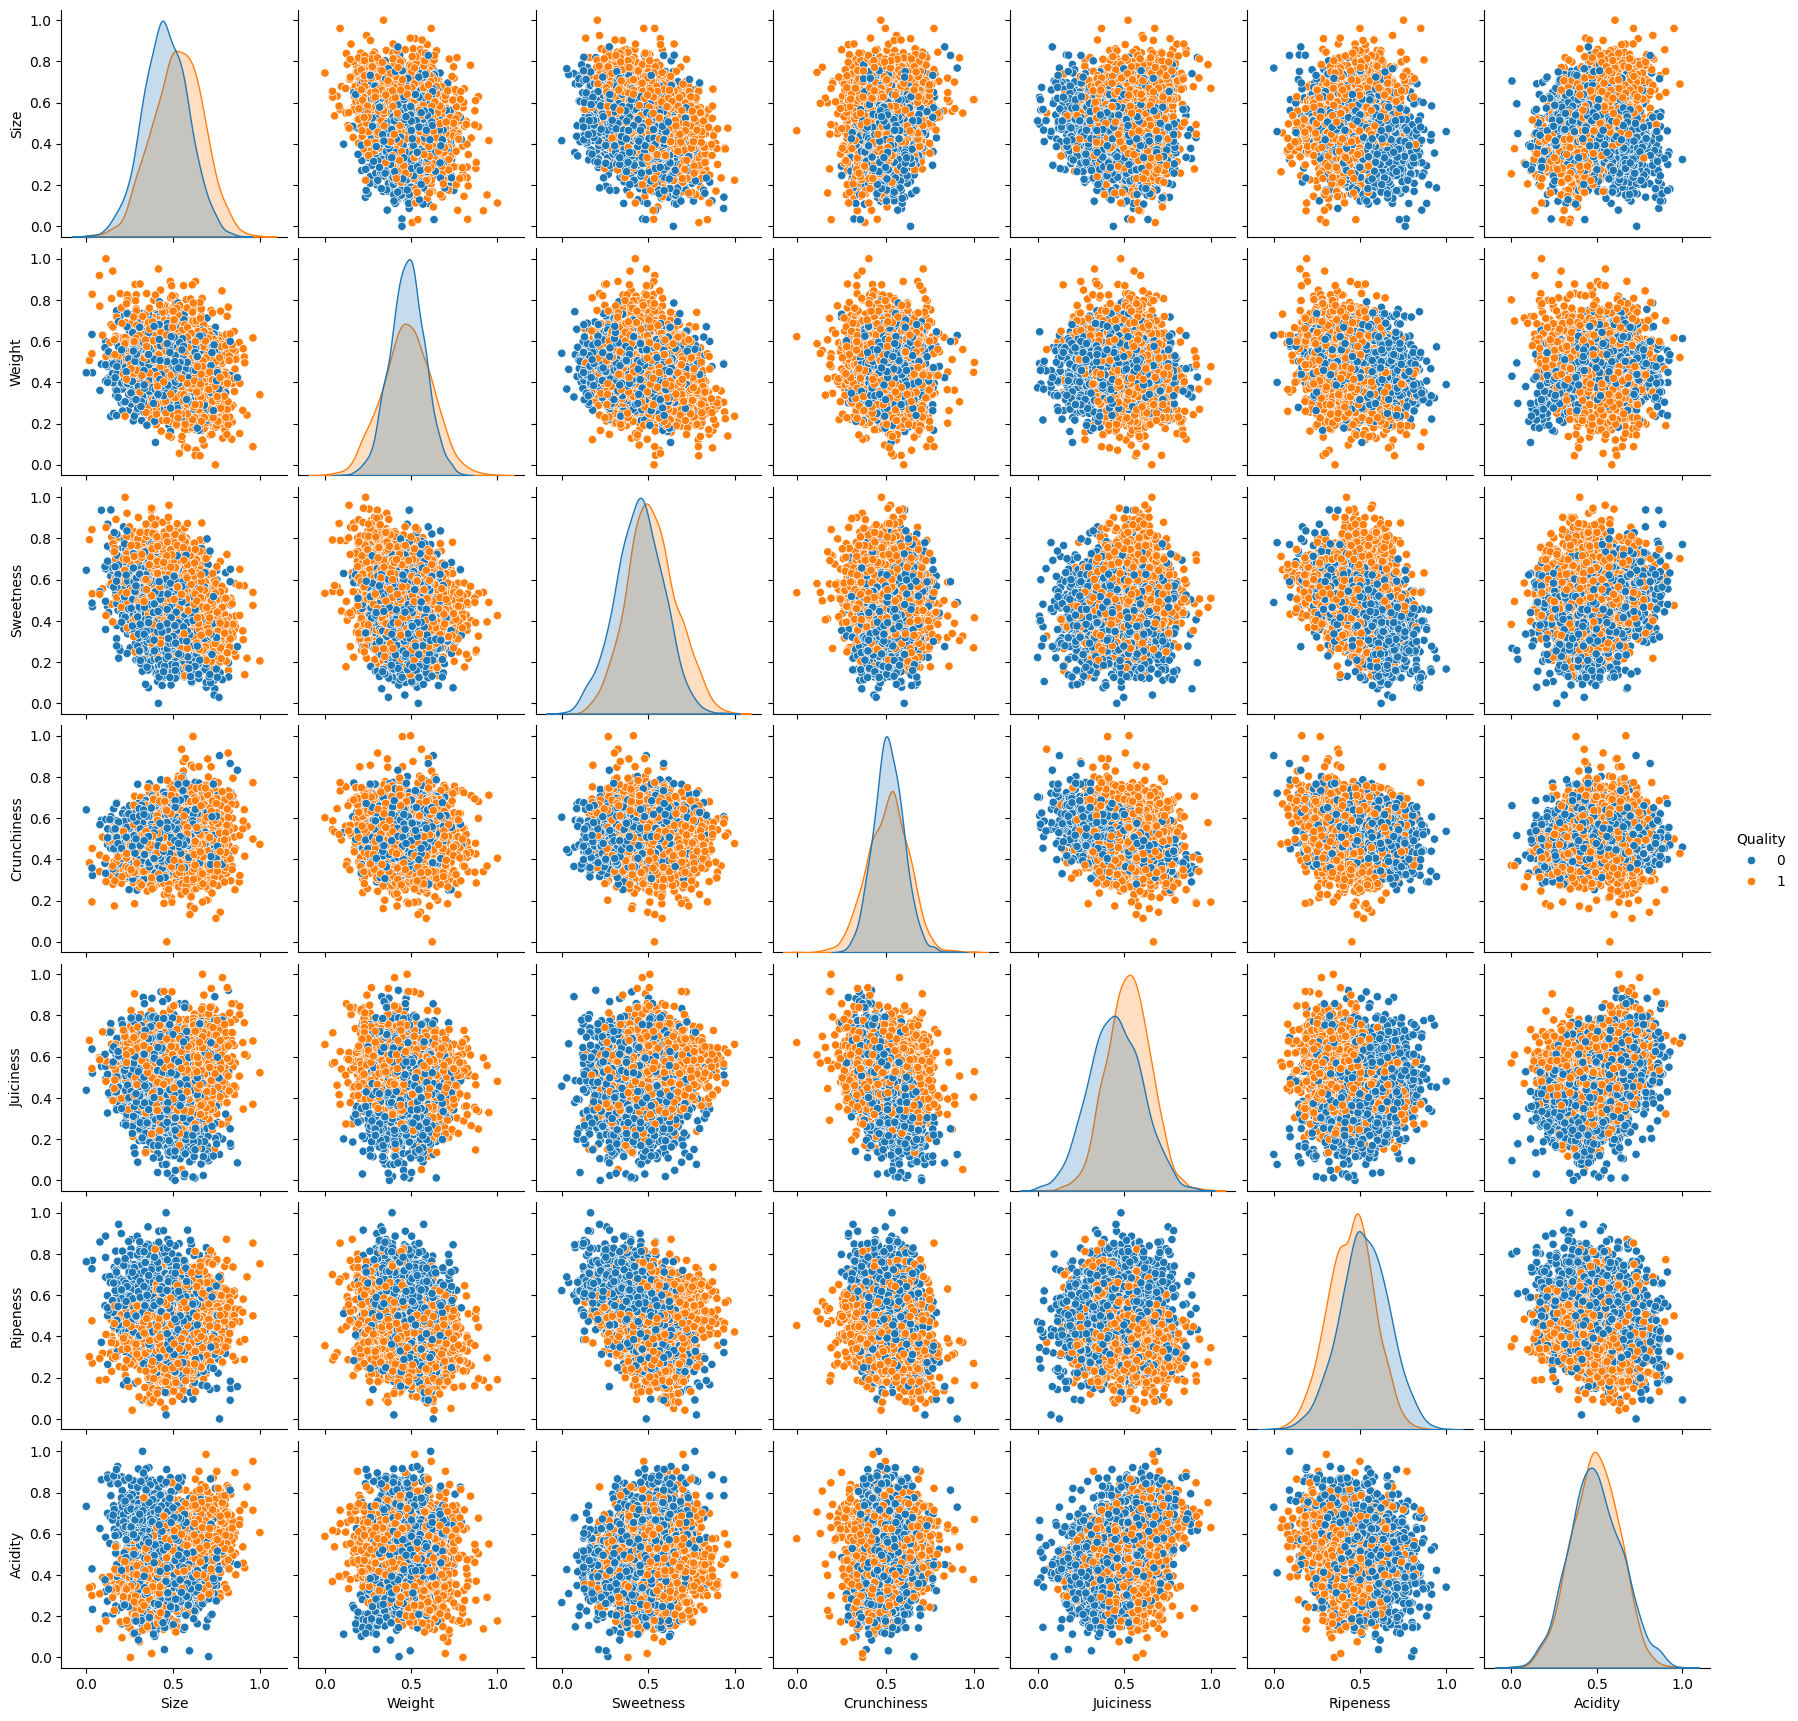

In [ ]:
# Pairplot for numeric features colored by 'Quality'
sns.pairplot(df, hue='Quality', diag_kind='kde')
plt.show()


Correlation Heatmap: A heatmap showing the correlation between numeric features.

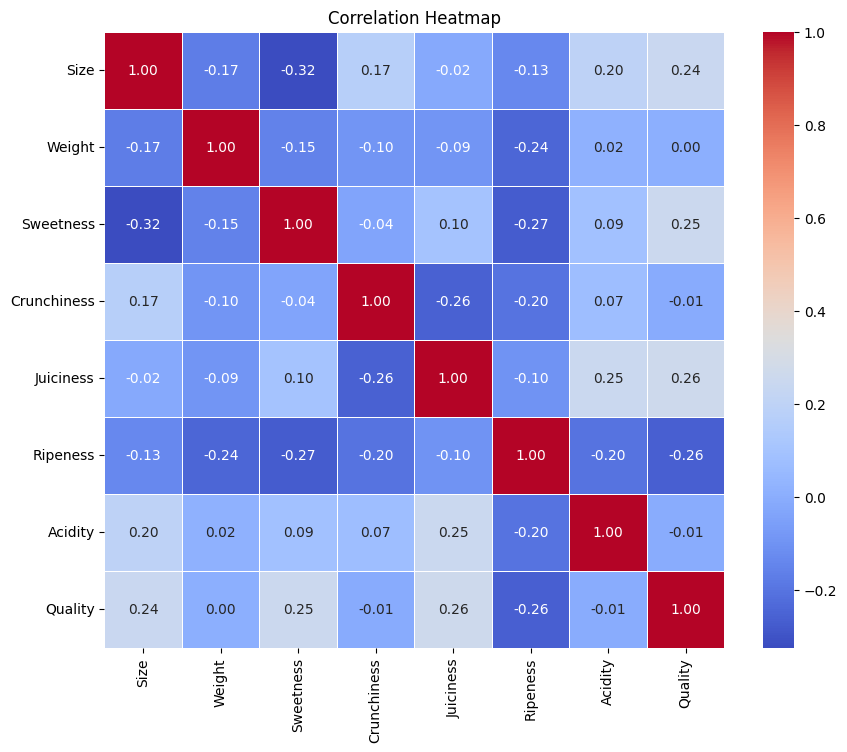

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**INFERENCES**

Correlation Analysis:

The correlation heatmap shows the correlation between different features. Pay attention to strong correlations, as they can indicate relationships between variables.

Pairplot Analysis:

Observing the pairplot, you can see how the numeric features are distributed and if there are any apparent patterns or clusters. This can be useful in identifying potential groupings or separations between 'good' and 'bad' quality.

Boxplot Analysis:

The boxplots provide insights into the distribution of each feature for both 'good' and 'bad' quality. Outliers and the range of values for each feature can be observed.


